# Test of the Ben Sira package

*Project realised by Mayank Mishra, Prunelle Daudré--Treuil and Shehenaz Hossain*

**For the Ben Sira variant analysis Project for the NLP Master of the Lorraine University (2023), under the supervision of J.S. Ray and S.Robert** 


## Import :

In [15]:
from pkg.Variant import VariantsFinder
from pkg.Witness import Witness
from pkg.Stats import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## Constantes :

To update depending of the manuscript :

In [2]:
UNWANTED_TAGS = ["folio","verse_nb","line","vacat_car","greek","reconstructed","superscript",\
                    "supralinear","margin_reconstructed","margin_car","margin_infralinear",\
                    "margin_supralinear","Article"]

TO UNDERSTAND THE XML FILES :

                <!ELEMENT folio (#PCDATA)> <!-- shelfmark of the manuscript and folio number -->
                <!ELEMENT verse_nb (#PCDATA)> <!-- verse (children of chapter) -->
                <!ELEMENT line (#PCDATA)> <!-- line on the manuscript -->
                <!ELEMENT vacat_car (#PCDATA)> <!-- a space into the manuscript -->
                <!ELEMENT greek (#PCDATA)> <!-- greek word or letter -->
                <!ELEMENT reconstructed (#PCDATA)> <!-- Hebrew reconstructed -->
                <!ELEMENT superscript (#PCDATA)> <!-- Hebrew superscript letters or words -->
                <!ELEMENT supralinear (#PCDATA)> <!-- Hebrew supralinear letters or words (I think = superscript) -->
                <!ELEMENT margin_reconstructed (#PCDATA)> <!-- marginal notation reconstructed -->
                <!ELEMENT margin_car (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_infralinear (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_supralinear (#PCDATA)> <!-- marginal notation -->

## Exemples :

In [3]:
fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]
folder = "WorkDir/"

First we create a `VariantsFinder` object. At this creation, the object will match all chapters and verses, clean the verses and compute the collations and the distances for each verses :

In [4]:
vf = VariantsFinder(fileNames, UNWANTED_TAGS, folder = folder)

# Matching Done
## Cleaning Done
### Collation Done
#### Distance Done
##### Errors Classification Done


We give a random exemple. It is important to note that the representation use here is simple_SVG, the normal SVG generating a lot of unwanted errors.

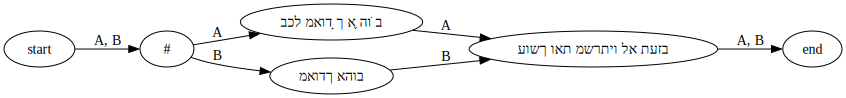

In [5]:
vf.getSampleVariant()

The following exemple will run on the first witness, to test the different representation.

In [6]:
test = vf.witnesses[1]
print(test)

Verse 28 : aligned
+---+---+--------------------+---------------------+
| A |   | בני בענוה כבד נפשך | ויתן לך טם כיוצא בﬣ |
| B | - | בני בענוה כבד נפשך | ותן לה טעם כיוצ     |
+---+---+--------------------+---------------------+


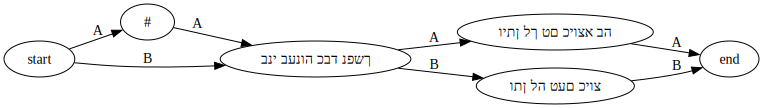

In [7]:
test.getSVG()

In [8]:
test.getHTML()

A,,בני בענוה כבד נפשך,ויתן לך טם כיוצא בﬣ
B,-,בני בענוה כבד נפשך,ותן לה טעם כיוצ


In [9]:
print(test.getCSV())

A, ,בני בענוה כבד נפשך ,ויתן לך טם כיוצא בﬣ 
B,,בני בענוה כבד נפשך ,ותן לה טעם כיוצ



The following exemple show the DataFrame of the `VariantsFinder` object.

In [10]:
df = vf.getDF()
df

,Verse A,Verse B,Variant A,Variant B,Manuscript A,Manuscript B,Chapter A,Chapter B,Verse,Levenshtein,Hamming,Inversion,Difference
0,אַל תתחכם לעבד חפצך ואל תתכעת צרכך,אל תתחכם לעשות חפצך ואל תתכב,"[, א, ַ, ל, לעבד, תתכעת, צרכך]","[אל, לעשות, תתכב]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,26,8,11,None,- אַל\n? -\n\n+ אל\n תתחכם\n- לעבד\n+ לעשות\...
1,בני בענוה כבד נפשך ויתן לך טם כיוצא בﬣ,בני בענוה כבד נפשך ותן לה טעם כיוצ,"[, ויתן, לך, טם, כיוצא, בﬣ]","[ותן, לה, טעם, כיוצ]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,28,6,9,None,בני\n בענוה\n כבד\n נפשך\n- ויתן\n? -\n\...
2,בין אחים ראשם נכבד וירא אלהים בעינ,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,"[, בעינ]","[נכבד, ממנו]",ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,20,6,8,None,בין\n אחים\n ראשם\n נכבד\n וירא\n אלהים...
3,אין לבזות דל משכיל ואין לכבד כל איש כם,אין לבזות דל משכיל ואין לכבד כל איש חמס,"[, כם]",[חמס],ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,23,3,3,None,אין\n לבזות\n דל\n משכיל\n ואין\n לכבד\...
4,טוב עובד ויותר הון ממתכבד חס מתן,טוב עובד ויותר הון ממתכבד,"[, חס, מתן]",[],ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,27,5,5,None,טוב\n עובד\n ויותר\n הון\n ממתכבד\n- חס\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,אוהב שונא תחת כל יצהל,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,[],"[כסוס, מוכן, אוהב]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,6,12,12,None,+ כסוס\n+ מוכן\n אוהב\n שונא\n תחת\n כל\n+...
149,מת בחכמת ייי נשפטו ויש מהם מועד,אבל בחכמת ייי נשפטו ויש מהם מוע,"[מת, מועד]","[אבל, מוע]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,8,4,6,None,- מת\n+ אבל\n בחכמת\n ייי\n נשפטו\n ויש\n ...
150,ר ואחר תעשה ובית מנוח ואחר תגיה,הכין אומר ואחר תעשה ובית מנוח ואחר תגיה,[ר],"[הכין, אומר]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,4,7,8,None,- ר\n+ הכין\n+ אומר\n ואחר\n תעשה\n ובית\n ...
151,שונא תורה ומתמוטט כמסערה,לא יחכם שונא תורה ומתמוטט כמסערה,[],"[לא, יחכם]",ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,2,6,6,None,+ לא\n+ יחכם\n שונא\n תורה\n ומתמוטט\n כמסערה


Finally, here is an exemple of the mardown and csv export. By default, the variants are saved under the files `"Variants.md"` and `"Variants.csv"`.

In [11]:
vf.getCSV()
vf.getMarkdown()

## Statistiques :
First let's split the dataframe by Manuscript A.

In [12]:
dfs = []
for file in fileNames:
    dfs.append((file, subdataframe_enhancer(subdataframe_extractor(df, file), file)))

Now, we can create some exemple of what we can do with the `"Stats.py"` files :

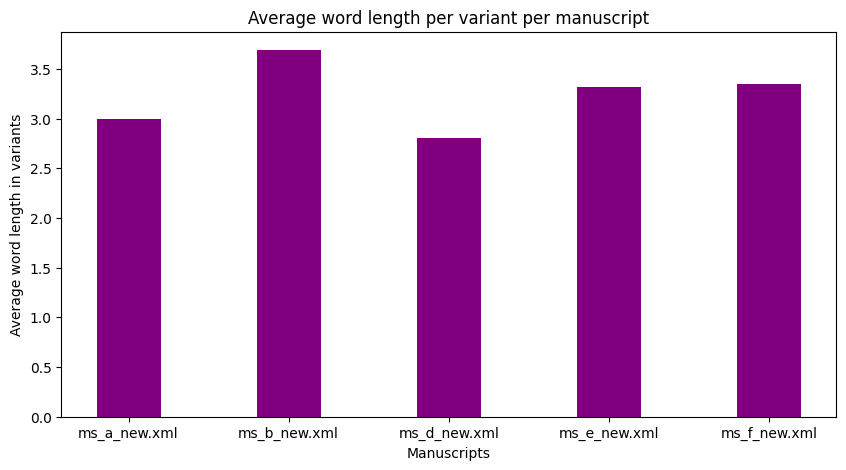

In [13]:
# creating the dataset
data = {file:avg_word_len(df) for file, df in dfs}
manuscripts = list(data.keys())
avg_variant_word_len = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(manuscripts, avg_variant_word_len, color ='purple',
        width = 0.4)
 
plt.xlabel("Manuscripts")
plt.ylabel("Average word length in variants")
plt.title("Average word length per variant per manuscript")
plt.show()

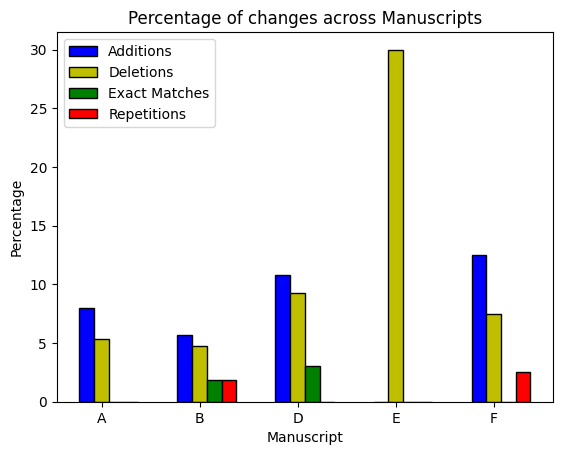

In [14]:
Addition = [word_addition_per(df) for file,df in dfs]
Deletion = [word_deletion_per(df) for file,df in dfs]
Exact_matches = [exact_match_per(df) for file,df in dfs]
Repetitions = [word_repitition_per(df) for file,df in dfs]
  
n=5
r = np.arange(n)
width = 0.15
  
  
plt.bar(r, Addition, color = 'b',
        width = width, edgecolor = 'black',
        label='Additions')

plt.bar(r+width, Deletion, color = 'y',
        width = width, edgecolor = 'black',
        label='Deletions')

plt.bar(r + 2*width, Exact_matches, color = 'g',
        width = width, edgecolor = 'black',
        label='Exact Matches')
  
plt.bar(r + 3*width, Repetitions, color = 'r',
        width = width, edgecolor = 'black',
        label='Repetitions')


plt.xlabel("Manuscript")
plt.ylabel("Percentage")
plt.title("Percentage of changes across Manuscripts")
  
# plt.grid(linestyle='--')
plt.xticks(r + width,['A','B','D','E', 'F'])
plt.legend()
  
plt.show()

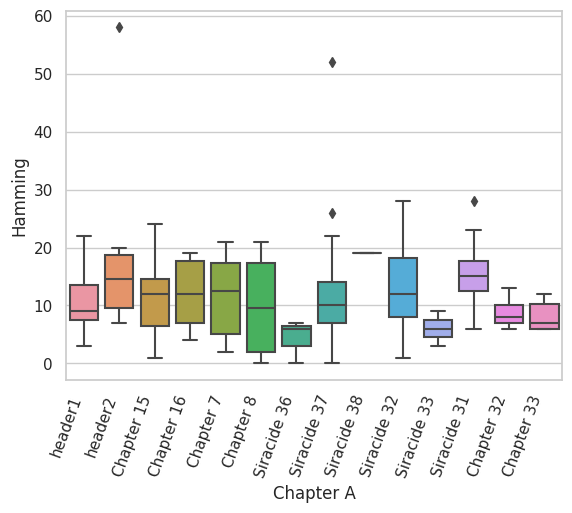

In [23]:
# Create boxplot for levenshtein distances based upon chapter
ax = sns.boxplot(x="Chapter A", y="Hamming", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()

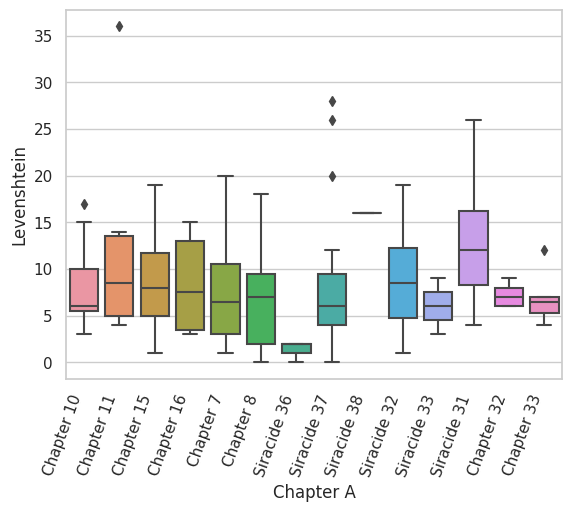

In [25]:
# Create boxplot for levenshtein distances based upon chapter
ax = sns.boxplot(x="Chapter A", y="Levenshtein", data=df) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")
plt.show()